<a href="https://colab.research.google.com/github/Alexflames/frame-detection/blob/master/frame_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Автор
Григорьев Алексей, 451 группа, КНиИТ

## Задание
С помощью машинного обучения научиться различать рамки у картин для последующего вырезания и превращения изображений картин с рамками в картины **без** рамок

### Часть 1 - классическое решение на OpenCV
##### **"Простой" набор данных**
[Первый набор данных](https://drive.google.com/open?id=19Wx9l9C6IovJ5n1OTYzmt39w5cmIgzHJ) представляет 200 "простых для обработки" изображений картин с рамками,
собраны в поисковике google, посредством отфильтрации подходящих вручную.
- **Все** картины имеют рамки;
- Картины **не** повернуты под углом;
- Может быть свободное пространство любого цвета **до** рамки, **после** рамки перед изображением;
- Рамки преимущественно монотонные, но также иногда встречаются объмные варианты;
- Возможно наличие теней или других эффектов окружающего мира на центральной части изображения / с какой-то стороны от картины;
- Форматы изображений `.jpg | .png | .webp`;
- Изображения разных размеров, разное соотношение сторон;
- Различная цветовая гамма.

##### **Программа**
Далее следуют фрагменты программы для решения задачи



**Шаг №1**

Загрузка изображений из гугл-диска по ссылке. Выбор X изображений из набора и вывод на экран.

Фрагмент с загрузкой файлов взят из практики 3 с курса по ML. Слегка модифицирован

In [13]:
from google.colab import auth
from googleapiclient.discovery import build
import io
from googleapiclient.http import MediaIoBaseDownload

def download_data(file_id, file_name):
  request = drive_service.files().get_media(fileId=file_id)
  downloaded = io.BytesIO()
  downloader = MediaIoBaseDownload(downloaded, request)
  done = False
  while done is False:
    _, done = downloader.next_chunk()
    
  downloaded.seek(0)
  with open(file_name, "wb") as f:
    f.write(downloaded.read())

  
auth.authenticate_user()
drive_service = build('drive', 'v3')

folder_name = 'pictureset_simple_1'
file_id = '1IfQwOLV2YLbBDSHYg7o4QkWHfcsz7GLi'
file_name = folder_name + '.zip'

download_data(file_id, file_name)
!mkdir pictureset_simple_1
!unzip pictureset_simple_1.zip -d pictureset_simple_1
!ls

mkdir: cannot create directory ‘pictureset_simple_1’: File exists
Archive:  pictureset_simple_1.zip
replace pictureset_simple_1/pic1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
adc.json  pictureset_simple_1  pictureset_simple_1.zip	sample_data


In [0]:
# Можно раскомментировать и запустить чтобы посмотреть структуру проекта 
# !ls

In [0]:
# Можно раскомментировать и запустить чтобы посмотреть структуру проекта 
# !ls pictureset_simple_1

Возьмем X изображений из папки `pictureset_simple_1` и выведем на экран

In [0]:
import os
filenames = []
for filename in os.listdir(folder_name):
  filenames.append(os.path.join(folder_name, filename))

Выборка X изображений.

In [0]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

X = 9

random_index = np.random.choice(range(len(filenames)), X)
chosen_pictures = []

for i_normal, index in enumerate(random_index):
  img_picked = cv2.imread(filenames[index])
  chosen_pictures.append(img_picked)

 Смените флаг `show_images` на True чтобы вывести выбранные изображения на экран

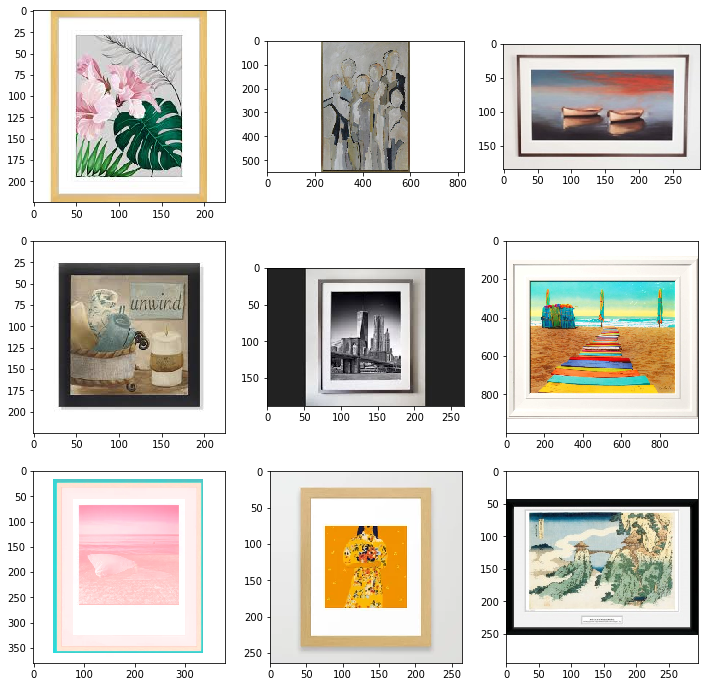

In [35]:
show_images = True

def nearest_square(limit):
    answer = 0
    while (answer+1)**2 < limit:
        answer += 1
    return answer**2

X_nearest_square = nearest_square(X) - 1 # расположим X фигур в квадрате
fig, axeslist = plt.subplots(ncols=X_nearest_square, nrows = X_nearest_square)

for i in range(len(chosen_pictures)):
  img_picked = chosen_pictures[i]
  axeslist.ravel()[i].imshow(img_picked[:, :, ::-1]) # показ переведенного из BGR в RGB изображения
  #axeslist.ravel()[i].set_axis_off()
  chosen_pictures.append(img_picked)

plt.rcParams["figure.figsize"] = (12,12)
plt.show()